# **Load The Data** 
The pickled data is a dictionary with 4 key/value pairs:

- **features** is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- **labels** is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
- **sizes** is a list containing tuples, (width, height) representing the original width and height the image.
- **coords** is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. 

**THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [1]:
import pandas as pd
import numpy as np
# Load pickled data
import pickle
import warnings
warnings.filterwarnings('ignore')

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
#print(train)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
# print("trainX")
# print(X_train[0:5])
# print("$$$$$$$$$$$$")
# print(y_train)
# print("$$$$$$$$$$$$")
train_sizes, train_coords = train['sizes'], train['coords']
valid_sizes, valid_coords = valid['sizes'], valid['coords']
test_sizes, test_coords = test['sizes'], test['coords']
# print("$$$$$$$$$$$$")
# print("trainsize")
# print(train_sizes)
# print("$$$$$$$$$$$$")
# print("train_coords")
# print(train_coords)
print("Done importing images.")


Done importing images.


# **Dataset Summary & Exploration**
**Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas**

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# the shape of a traffic sign image
image_shape = X_train[0].shape
image_shape_with_n_train =  X_train.shape
# numbre of classes/labels there are in the dataset.
n_classes = len(pd.Series(y_train).unique())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# **Data exploration visualization.**
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline


In [4]:
#Load the signname csv file
signnames = pd.read_csv('./signnames.csv')
signnames.set_index('ClassId',inplace=True)

def get_name_from_label(label):
    # Helper, transofrm a numeric label into the corresponding strring
    return signnames.loc[label].SignName

In [5]:

counter = Counter(y_train)
print("Train example per class mean {} min {} max {}".format(int(np.mean(list(Counter(y_train).values()))),
                                                    np.min(list(Counter(y_train).values())) ,
                                                    np.max(list(Counter(y_train).values())) ))
print("Most common signs:")
for el in counter.most_common(10):
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))
print()
print("Most rare signs:")
for el in sorted(counter.items(),key=lambda x: x[1])[:10]:
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))



Train example per class mean 809 min 180 max 2010
Most common signs:
'Speed limit (50km/h)'  train samples: 2010
'Speed limit (30km/h)'  train samples: 1980
'Yield'  train samples: 1920
'Priority road'  train samples: 1890
'Keep right'  train samples: 1860
'No passing for vehicles over 3.5 metric tons'  train samples: 1800
'Speed limit (70km/h)'  train samples: 1770
'Speed limit (80km/h)'  train samples: 1650
'Road work'  train samples: 1350
'No passing'  train samples: 1320

Most rare signs:
'Go straight or left'  train samples: 180
'Dangerous curve to the left'  train samples: 180
'Speed limit (20km/h)'  train samples: 180
'End of no passing'  train samples: 210
'End of no passing by vehicles over 3.5 metric tons'  train samples: 210
'End of all speed and passing limits'  train samples: 210
'Pedestrians'  train samples: 210
'Bicycles crossing'  train samples: 240
'Road narrows on the right'  train samples: 240
'Keep left'  train samples: 270


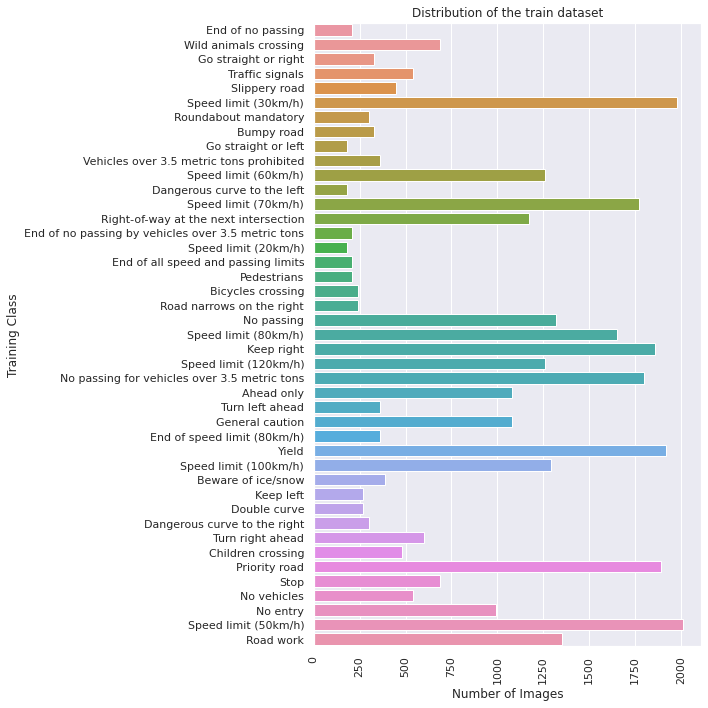

In [6]:

# Distribution of images per class 
counts = pd.DataFrame(columns=['sign_label','training_samples_count'],data=[(label, count) for label, count in counter.items()])
counts['sign'] = counts.sign_label.apply(get_name_from_label)

plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.barplot(data=counts,x='training_samples_count',y='sign')
plt.xticks(rotation=90)
plt.ylabel('Training Class')
plt.xlabel('Number of Images');
plt.title("Distribution of the train dataset")
plt.tight_layout()
#plt.savefig('training_set_counts.png')



#generate random image max 5 raw & clos

In [7]:
"""

def get_random_samples(n_max):
    selected = list()
    n_raw=5
    for current_label in range(n_raw):
        found=0
        while found<n_max:
            ii = np.random.randint(len(y_train))
            
            if current_label == y_train[ii]:
                selected.append(ii)
                found+=1

    assert len(selected) ==  n_raw*n_max
    return list(selected)
    plt.figure(figsize=(12, 16))



count=0
cols = 10
for ii in get_random_samples(cols):
    count+=1
    plt.subplot(5,cols,count)
    plt.imshow(X_train[ii])
    plt.axis('off')
plt.tight_layout()
#plt.savefig('random_examples.png')

"""

"\n\ndef get_random_samples(n_max):\n    selected = list()\n    n_raw=5\n    for current_label in range(n_raw):\n        found=0\n        while found<n_max:\n            ii = np.random.randint(len(y_train))\n            \n            if current_label == y_train[ii]:\n                selected.append(ii)\n                found+=1\n\n    assert len(selected) ==  n_raw*n_max\n    return list(selected)\n    plt.figure(figsize=(12, 16))\n\n\n\ncount=0\ncols = 10\nfor ii in get_random_samples(cols):\n    count+=1\n    plt.subplot(5,cols,count)\n    plt.imshow(X_train[ii])\n    plt.axis('off')\nplt.tight_layout()\n#plt.savefig('random_examples.png')\n\n"

#**Pre-process the Data Set (normalization, etc.)** 
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data,

In [8]:
import cv2
from sklearn.utils import shuffle
from skimage.transform import resize
from skimage.transform import rotate
from skimage.color import rgb2gray

In [9]:
#generate random value of image
def someRandomImageId(nb = n_train):
    return int(np.random.rand()*nb)

#normalize the data
def normalize_features_pos(img_):
    return (img_-img_.mean())/(np.max(img_)-np.min(img_))

#resize the data to (32,32)
def resizeSize(img, x=32, y=32):
    return cv2.resize(img,(x, y), interpolation = cv2.INTER_CUBIC)

#crop roi in image
def crop(img, ROI):
    return img[(ROI[1]):(ROI[3]),(ROI[0]):(ROI[2])]

#add a new roi
def addROI(img, ROI, color=(255,0, 0)):
    copy = img.copy()
    return cv2.rectangle(copy,(ROI[0],ROI[1]),(ROI[2],ROI[3]),color)


# rectify Coords  for selecting ROI
def rectifyCoords(nb, sizes, coords):
    rectified = []
    for j in range(0, nb):
        x_ratio = image_shape_with_n_train[1] / sizes[j][0]
        y_ratio = image_shape_with_n_train[2] / sizes[j][1]
        rectified.append((int(coords[j][0]*x_ratio), int(coords[j][1]*y_ratio), \
                          int(coords[j][2]*x_ratio), int(coords[j][3]*y_ratio)))
    return rectified
    
#Augmenting function
def augment_img(img,ROI):
    #crop ROI 
    crop_ROI = crop(img, ROI)
    #Resize ROI (32,32)
    Resized_ROI=resizeSize(crop_ROI)
    #normalize ROI
    normalize_ROI=normalize_features_pos(Resized_ROI)
    #Rotate ROI by a small angle [-15°, 15°] 
    rotated_ROI = rotate(normalize_ROI,np.random.rand()*30-15)
    #GrayScal
    #GrayScal_ROI = rgb2gray(rotated_ROI)
    
    return rotated_ROI

#print Augmenting image
def plotAugmentation(*argv, figsize=(20, 5), save=None):
    fig = plt.figure(figsize=figsize)
    for i in range(0, len(argv[0])):    
        ax=fig.add_subplot(1,len(argv[0]),i+1)        
        ax.imshow(argv[0][i][1])
        ax.set_title(argv[0][i][0])
    if save != None:
        plt.savefig(save)
    plt.show() 


rectified_train_coords = rectifyCoords(n_train, train_sizes, train_coords)
rectified_valid_coords = rectifyCoords(n_validation, valid_sizes, valid_coords)
rectified_test_coords  = rectifyCoords(n_test,  test_sizes,  test_coords)

print("Augmenting functions defined.")


Augmenting functions defined.


# **Region of interst Cropping** &  **Normalize**
- Neural networks offer much better results when the data is normalized because it creates more variation in the data values. Practically speaking normalizing the data means that the input values range from -1 to 1 instead of being between 0 and 255 in the case of images.
- In order to add more training data and to make the network more accurate, I rotate randomly the images by a small angle [-15°, 15°] around the center of the Region Of Interest.

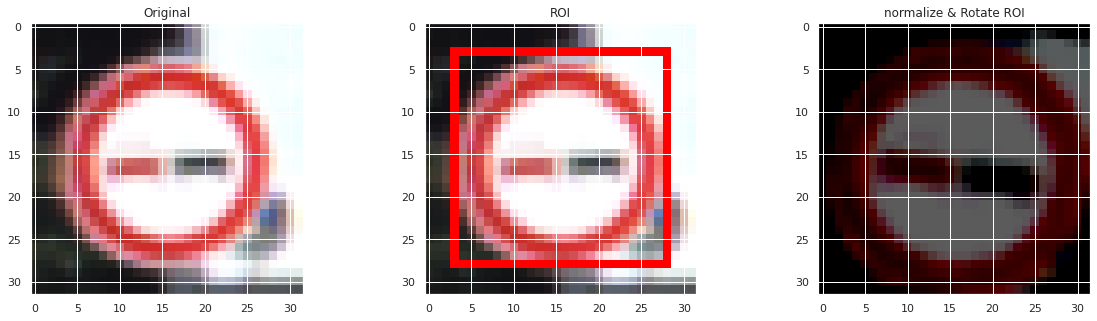

In [10]:

i = someRandomImageId()
#print(i)
#i=10852
arguments = (('Original', X_train[i]), ('ROI', addROI(X_train[i], rectified_train_coords[i])),('normalize & Rotate ROI', augment_img(X_train[i], rectified_train_coords[i])))
#print(augment_img(X_train[i], rectified_train_coords[i]).shape)
plotAugmentation(arguments)



#**Pre-processing All The Dataset**

In [11]:
#Training data splitting for validation dataset

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)


In [12]:
X_train = normalize_features_pos(X_train)
X_valid = normalize_features_pos(X_valid)
X_test = normalize_features_pos(X_test)

In [13]:
"""
#Augmented All dataset Using the augmented function

X_train_transf =[]
y_train_transf = []

for ii in range(0,num_img_needed):
    img = X_train[ii]
    label = y_train[ii]
    imgout = augment_img(img, rectified_train_coords[ii])
    imgout.shape = (1,) + imgout.shape + (1,)
    X_train_transf.append(imgout)
    y_train_transf.append(label)
    for j in range(10):
        imgout = augment_img(img, rectified_train_coords[ii])
        imgout.shape = (1,) + imgout.shape + (1,)
        X_train_transf.append(imgout)
        y_train_transf.append(label)



X_train_transf = np.concatenate(X_train_transf,axis=0)
y_train_transf = np.array(y_train_transf)


X_test_transf = []
X_valid_transf = []

for ii in range(X_valid.shape[0]):
    img = X_valid[ii]
    img = augment_img(img, rectified_train_coords[ii])
    img.shape = (1,) + img.shape + (1,)
    X_valid_transf.append(img)
    
for ii in range(X_test.shape[0]):
    img = X_test[ii]
    img = augment_img(img, rectified_train_coords[ii])
    img.shape = (1,) + img.shape + (1,)
    X_test_transf.append(img)


X_test_transf = np.concatenate(X_test_transf,axis=0)
X_valid_transf = np.concatenate(X_valid_transf,axis=0)


"""

'\n#Augmented All dataset Using the augmented function\n\nX_train_transf =[]\ny_train_transf = []\n\nfor ii in range(0,num_img_needed):\n    img = X_train[ii]\n    label = y_train[ii]\n    imgout = augment_img(img, rectified_train_coords[ii])\n    imgout.shape = (1,) + imgout.shape + (1,)\n    X_train_transf.append(imgout)\n    y_train_transf.append(label)\n    for j in range(10):\n        imgout = augment_img(img, rectified_train_coords[ii])\n        imgout.shape = (1,) + imgout.shape + (1,)\n        X_train_transf.append(imgout)\n        y_train_transf.append(label)\n\n\n\nX_train_transf = np.concatenate(X_train_transf,axis=0)\ny_train_transf = np.array(y_train_transf)\n\n\nX_test_transf = []\nX_valid_transf = []\n\nfor ii in range(X_valid.shape[0]):\n    img = X_valid[ii]\n    img = augment_img(img, rectified_train_coords[ii])\n    img.shape = (1,) + img.shape + (1,)\n    X_valid_transf.append(img)\n    \nfor ii in range(X_test.shape[0]):\n    img = X_test[ii]\n    img = augment_img

# **Model Architecture**

 **LeNet**
 


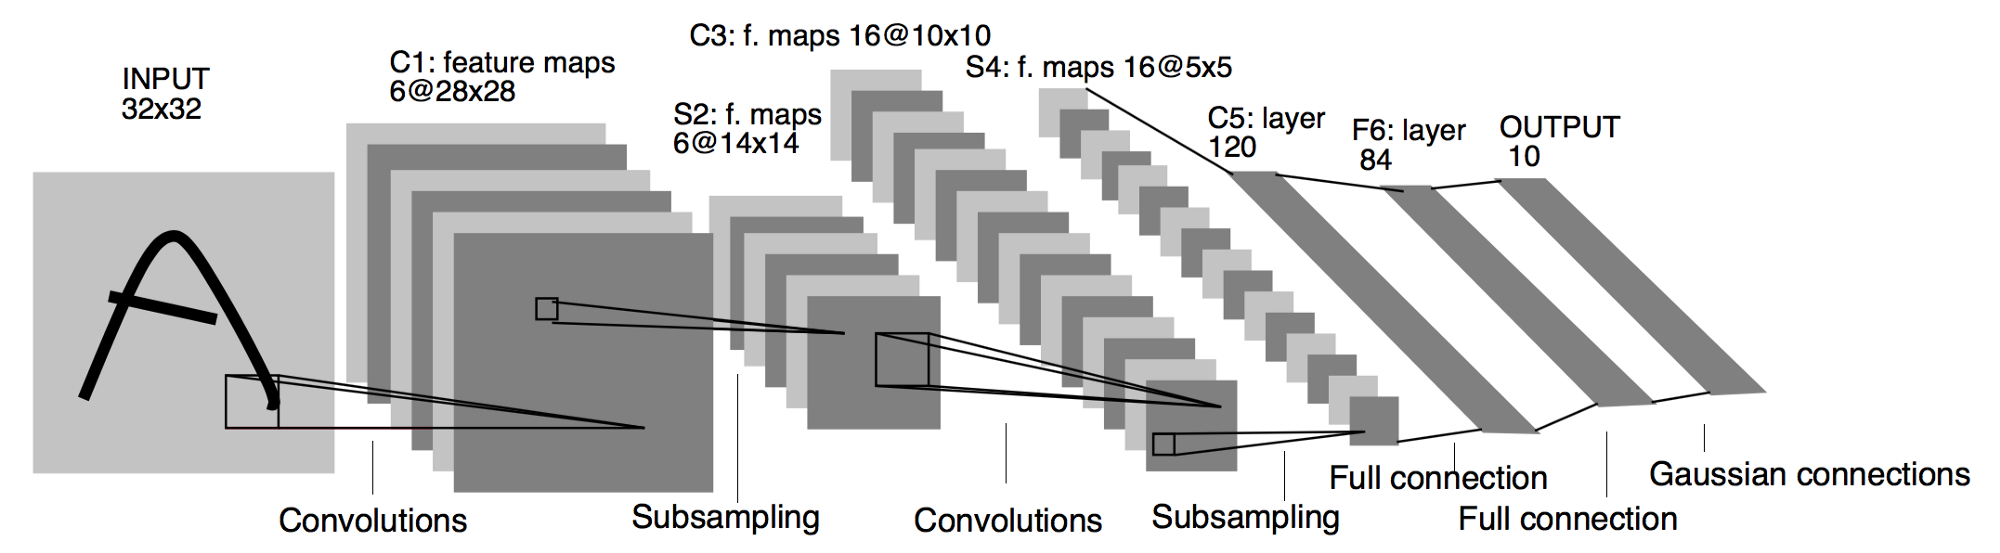

In [14]:
!pip install --upgrade tf_slim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 7.1 MB/s 


In [15]:
import tensorflow as tf
import tf_slim as slim
tf.compat.v1.disable_eager_execution()

In [16]:
#Test GPU 
#tf.test.gpu_device_name()

In [17]:
def LeNet(x): 
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.compat.v1.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation 1. using relu Activation Function
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.compat.v1.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation 2.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Flatten Input : reduces the input data into a single dimension 5x5x16 = 400
    # Flatten. Input = 5x5x16. Output = 400.
    flattened   = slim.flatten(conv2)
    
    #Matrix multiplication
    #input: 1x400
    #weight: 400x120 
    #Matrix multiplication(dot product rule)
    #output = 1x400 * 400*120 => 1x120
    
     # Layer 3: Fully Connected. Input = 400. Output = 120.
    fullyc1_W = tf.Variable(tf.compat.v1.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fullyc1_b = tf.Variable(tf.zeros(120))
    fullyc1   = tf.matmul(flattened, fullyc1_W) + fullyc1_b
    
    # Full connected layer activation 1.
    fullyc1    = tf.nn.relu(fullyc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fullyc2_W  = tf.Variable(tf.compat.v1.truncated_normal(shape=(120, 84), mean = 0, stddev = 0.1))
    fullyc2_b  = tf.Variable(tf.zeros(84))
    fullyc2    = tf.matmul(fullyc1, fullyc2_W) + fullyc2_b
    
    # Full connected layer activation 2.
    fullyc2    = tf.nn.relu(fullyc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fullyc3_W  = tf.Variable(tf.compat.v1.truncated_normal(shape=(84, 43), mean = 0, stddev = 0.1))
    fullyc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fullyc2, fullyc3_W) + fullyc3_b
    
    return logits

print("Model defined.")

Model defined.


# **Features and Labels**
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels. .

In [18]:
x = tf.compat.v1.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.compat.v1.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# **Train & Validate the Model**
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
"""      
Hyper parameters

"""

#learning rates745
learning_rate = 0.001
#the number of times the algorithm sees the entire data set
epochs = 42
#the number of samples (inputs) that will be passed through to the network at one time.
batch_size = 128


In [20]:
logits = LeNet(x)
#relation between probabilities and Erreur function CE
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

# **Model Evaluation**
Evaluate how well the accuracy of the model for a given dataset.

In [21]:
correct_prediction = tf.equal(predict_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.compat.v1.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_accuracy/num_examples

print("Evaluate function defined.")

Evaluate function defined.


In [22]:
from sklearn.utils import shuffle
from time import time
import logging, datetime

In [23]:

"""
Log File for Metadata 
"""
logger = logging.getLogger()
#create file handler for logger
def setup_file_logger(log_file):
    hdlr = logging.FileHandler(log_file)
    formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
    hdlr.setFormatter(formatter)
    logger.addHandler(hdlr) 
    logger.setLevel(logging.INFO)

def log(message):
    #outputs to Colab console
    print('{} {}'.format(datetime.datetime.now(), message))
    #outputs to file
    logger.info(message)

setup_file_logger('training_Modul.log')

# **Train the Model**

In [24]:
saver = tf.compat.v1.train.Saver()
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Start Training...")
    print("Number of epochs : {}".format(epochs))
    print("Batch size : {}".format(batch_size))
    print("Learning rate : {}".format(learning_rate))
    print()
    

    for i in range(epochs):
      try:
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
                        
            log("EPOCH {} ...".format(i+1))
            # Training data
            train_loss, train_accuracy = evaluate(X_train, y_train)
            log("Training Accuracy = {:.3f}".format(train_accuracy))
            print("Training error = {:.3f} ".format( train_loss ))
            # Validation data
            valid_loss, valid_accuracy = evaluate(X_valid, y_valid)
            log("Validation Accuracy = {:.3f}".format(valid_accuracy))
            print("Validation error = {:.3f}".format(valid_loss))
            print()


      except KeyboardInterrupt:
          test_loss, test_accuracy = evaluate(X_valid, y_valid)
          log('Accuracy Model On Test Images: {}'.format(test_accuracy))
          print('Loss Model On Test Images: {}'.format(test_loss))   
          break

        
    saver.save(sess, 'LeNet_Modul')
    print("Model saved")

Start Training...
Number of epochs : 42
Batch size : 128
Learning rate : 0.001



INFO:root:EPOCH 1 ...


2022-08-13 19:25:07.125163 EPOCH 1 ...


INFO:root:Training Accuracy = 0.760


2022-08-13 19:25:08.358774 Training Accuracy = 0.760
Training error = 0.756 


INFO:root:Validation Accuracy = 0.702


2022-08-13 19:25:08.588577 Validation Accuracy = 0.702
Validation error = 1.001



INFO:root:EPOCH 2 ...


2022-08-13 19:25:10.469138 EPOCH 2 ...


INFO:root:Training Accuracy = 0.918
INFO:root:Validation Accuracy = 0.824


2022-08-13 19:25:11.609980 Training Accuracy = 0.918
Training error = 0.307 
2022-08-13 19:25:11.747087 Validation Accuracy = 0.824
Validation error = 0.610



INFO:root:EPOCH 3 ...


2022-08-13 19:25:13.450862 EPOCH 3 ...


INFO:root:Training Accuracy = 0.950
INFO:root:Validation Accuracy = 0.866


2022-08-13 19:25:14.558056 Training Accuracy = 0.950
Training error = 0.191 
2022-08-13 19:25:14.681226 Validation Accuracy = 0.866
Validation error = 0.506



INFO:root:EPOCH 4 ...


2022-08-13 19:25:16.295648 EPOCH 4 ...


INFO:root:Training Accuracy = 0.966
INFO:root:Validation Accuracy = 0.884


2022-08-13 19:25:17.375747 Training Accuracy = 0.966
Training error = 0.131 
2022-08-13 19:25:17.521367 Validation Accuracy = 0.884
Validation error = 0.473



INFO:root:EPOCH 5 ...


2022-08-13 19:25:19.345870 EPOCH 5 ...


INFO:root:Training Accuracy = 0.974
INFO:root:Validation Accuracy = 0.877


2022-08-13 19:25:20.657126 Training Accuracy = 0.974
Training error = 0.100 
2022-08-13 19:25:20.832057 Validation Accuracy = 0.877
Validation error = 0.566



INFO:root:EPOCH 6 ...


2022-08-13 19:25:22.579701 EPOCH 6 ...


INFO:root:Training Accuracy = 0.982
INFO:root:Validation Accuracy = 0.883


2022-08-13 19:25:23.635302 Training Accuracy = 0.982
Training error = 0.076 
2022-08-13 19:25:23.776702 Validation Accuracy = 0.883
Validation error = 0.538



INFO:root:EPOCH 7 ...


2022-08-13 19:25:25.385372 EPOCH 7 ...


INFO:root:Training Accuracy = 0.987
INFO:root:Validation Accuracy = 0.886


2022-08-13 19:25:26.408112 Training Accuracy = 0.987
Training error = 0.057 
2022-08-13 19:25:26.538248 Validation Accuracy = 0.886
Validation error = 0.489



INFO:root:EPOCH 8 ...


2022-08-13 19:25:28.129023 EPOCH 8 ...


INFO:root:Training Accuracy = 0.989
INFO:root:Validation Accuracy = 0.893


2022-08-13 19:25:29.274356 Training Accuracy = 0.989
Training error = 0.047 
2022-08-13 19:25:29.402899 Validation Accuracy = 0.893
Validation error = 0.488



INFO:root:EPOCH 9 ...


2022-08-13 19:25:30.994493 EPOCH 9 ...


INFO:root:Training Accuracy = 0.982
INFO:root:Validation Accuracy = 0.879


2022-08-13 19:25:31.773090 Training Accuracy = 0.982
Training error = 0.060 
2022-08-13 19:25:31.869039 Validation Accuracy = 0.879
Validation error = 0.554



INFO:root:EPOCH 10 ...


2022-08-13 19:25:33.053020 EPOCH 10 ...


INFO:root:Training Accuracy = 0.993
INFO:root:Validation Accuracy = 0.904


2022-08-13 19:25:33.748708 Training Accuracy = 0.993
Training error = 0.031 
2022-08-13 19:25:33.844939 Validation Accuracy = 0.904
Validation error = 0.519



INFO:root:EPOCH 11 ...


2022-08-13 19:25:34.966132 EPOCH 11 ...


INFO:root:Training Accuracy = 0.989
INFO:root:Validation Accuracy = 0.894


2022-08-13 19:25:35.688798 Training Accuracy = 0.989
Training error = 0.036 
2022-08-13 19:25:35.780894 Validation Accuracy = 0.894
Validation error = 0.587



INFO:root:EPOCH 12 ...


2022-08-13 19:25:36.902539 EPOCH 12 ...


INFO:root:Training Accuracy = 0.987
INFO:root:Validation Accuracy = 0.889


2022-08-13 19:25:37.591505 Training Accuracy = 0.987
Training error = 0.041 
2022-08-13 19:25:37.687714 Validation Accuracy = 0.889
Validation error = 0.571



INFO:root:EPOCH 13 ...


2022-08-13 19:25:38.824979 EPOCH 13 ...


INFO:root:Training Accuracy = 0.985
INFO:root:Validation Accuracy = 0.882


2022-08-13 19:25:39.527661 Training Accuracy = 0.985
Training error = 0.045 
2022-08-13 19:25:39.617737 Validation Accuracy = 0.882
Validation error = 0.640



INFO:root:EPOCH 14 ...


2022-08-13 19:25:40.714831 EPOCH 14 ...


INFO:root:Training Accuracy = 0.996
INFO:root:Validation Accuracy = 0.908


2022-08-13 19:25:41.393969 Training Accuracy = 0.996
Training error = 0.015 
2022-08-13 19:25:41.492474 Validation Accuracy = 0.908
Validation error = 0.551



INFO:root:EPOCH 15 ...


2022-08-13 19:25:42.594199 EPOCH 15 ...


INFO:root:Training Accuracy = 0.988
INFO:root:Validation Accuracy = 0.906


2022-08-13 19:25:43.268710 Training Accuracy = 0.988
Training error = 0.038 
2022-08-13 19:25:43.359150 Validation Accuracy = 0.906
Validation error = 0.518



INFO:root:EPOCH 16 ...


2022-08-13 19:25:44.450818 EPOCH 16 ...


INFO:root:Training Accuracy = 0.997
INFO:root:Validation Accuracy = 0.907


2022-08-13 19:25:45.150042 Training Accuracy = 0.997
Training error = 0.013 
2022-08-13 19:25:45.244104 Validation Accuracy = 0.907
Validation error = 0.545



INFO:root:EPOCH 17 ...


2022-08-13 19:25:46.390823 EPOCH 17 ...


INFO:root:Training Accuracy = 0.993
INFO:root:Validation Accuracy = 0.904


2022-08-13 19:25:47.086351 Training Accuracy = 0.993
Training error = 0.024 
2022-08-13 19:25:47.181540 Validation Accuracy = 0.904
Validation error = 0.548



INFO:root:EPOCH 18 ...


2022-08-13 19:25:48.284959 EPOCH 18 ...


INFO:root:Training Accuracy = 0.997
INFO:root:Validation Accuracy = 0.900


2022-08-13 19:25:48.981049 Training Accuracy = 0.997
Training error = 0.015 
2022-08-13 19:25:49.073990 Validation Accuracy = 0.900
Validation error = 0.631



INFO:root:EPOCH 19 ...


2022-08-13 19:25:50.153785 EPOCH 19 ...


INFO:root:Training Accuracy = 0.996
INFO:root:Validation Accuracy = 0.915


2022-08-13 19:25:50.847925 Training Accuracy = 0.996
Training error = 0.013 
2022-08-13 19:25:50.965195 Validation Accuracy = 0.915
Validation error = 0.579



INFO:root:EPOCH 20 ...


2022-08-13 19:25:52.088591 EPOCH 20 ...


INFO:root:Training Accuracy = 0.998
INFO:root:Validation Accuracy = 0.921


2022-08-13 19:25:52.776899 Training Accuracy = 0.998
Training error = 0.008 
2022-08-13 19:25:52.869015 Validation Accuracy = 0.921
Validation error = 0.499



INFO:root:EPOCH 21 ...


2022-08-13 19:25:53.980763 EPOCH 21 ...


INFO:root:Training Accuracy = 0.997
INFO:root:Validation Accuracy = 0.912


2022-08-13 19:25:54.661555 Training Accuracy = 0.997
Training error = 0.010 
2022-08-13 19:25:54.760644 Validation Accuracy = 0.912
Validation error = 0.575



INFO:root:EPOCH 22 ...


2022-08-13 19:25:55.857176 EPOCH 22 ...


INFO:root:Training Accuracy = 0.995
INFO:root:Validation Accuracy = 0.906


2022-08-13 19:25:56.563149 Training Accuracy = 0.995
Training error = 0.016 
2022-08-13 19:25:56.658138 Validation Accuracy = 0.906
Validation error = 0.627



INFO:root:EPOCH 23 ...


2022-08-13 19:25:57.751132 EPOCH 23 ...


INFO:root:Training Accuracy = 0.996
INFO:root:Validation Accuracy = 0.915


2022-08-13 19:25:58.445349 Training Accuracy = 0.996
Training error = 0.013 
2022-08-13 19:25:58.539050 Validation Accuracy = 0.915
Validation error = 0.523



INFO:root:EPOCH 24 ...


2022-08-13 19:25:59.660450 EPOCH 24 ...


INFO:root:Training Accuracy = 0.994
INFO:root:Validation Accuracy = 0.904


2022-08-13 19:26:00.343328 Training Accuracy = 0.994
Training error = 0.020 
2022-08-13 19:26:00.438838 Validation Accuracy = 0.904
Validation error = 0.621



INFO:root:EPOCH 25 ...


2022-08-13 19:26:01.578933 EPOCH 25 ...


INFO:root:Training Accuracy = 0.994
INFO:root:Validation Accuracy = 0.905


2022-08-13 19:26:02.270376 Training Accuracy = 0.994
Training error = 0.020 
2022-08-13 19:26:02.362527 Validation Accuracy = 0.905
Validation error = 0.618



INFO:root:EPOCH 26 ...


2022-08-13 19:26:03.479913 EPOCH 26 ...


INFO:root:Training Accuracy = 0.999
INFO:root:Validation Accuracy = 0.916


2022-08-13 19:26:04.167508 Training Accuracy = 0.999
Training error = 0.003 
2022-08-13 19:26:04.260582 Validation Accuracy = 0.916
Validation error = 0.644



INFO:root:EPOCH 27 ...


2022-08-13 19:26:05.366445 EPOCH 27 ...


INFO:root:Training Accuracy = 0.999
INFO:root:Validation Accuracy = 0.914


2022-08-13 19:26:06.066598 Training Accuracy = 0.999
Training error = 0.004 
2022-08-13 19:26:06.157931 Validation Accuracy = 0.914
Validation error = 0.626



INFO:root:EPOCH 28 ...


2022-08-13 19:26:07.303537 EPOCH 28 ...


INFO:root:Training Accuracy = 1.000
INFO:root:Validation Accuracy = 0.924


2022-08-13 19:26:07.994133 Training Accuracy = 1.000
Training error = 0.002 
2022-08-13 19:26:08.097058 Validation Accuracy = 0.924
Validation error = 0.589



INFO:root:EPOCH 29 ...


2022-08-13 19:26:09.210766 EPOCH 29 ...


INFO:root:Training Accuracy = 0.999
INFO:root:Validation Accuracy = 0.924


2022-08-13 19:26:09.893212 Training Accuracy = 0.999
Training error = 0.002 
2022-08-13 19:26:09.985955 Validation Accuracy = 0.924
Validation error = 0.737



INFO:root:EPOCH 30 ...


2022-08-13 19:26:11.091763 EPOCH 30 ...


INFO:root:Training Accuracy = 0.995
INFO:root:Validation Accuracy = 0.912


2022-08-13 19:26:11.761824 Training Accuracy = 0.995
Training error = 0.014 
2022-08-13 19:26:11.858595 Validation Accuracy = 0.912
Validation error = 0.658



INFO:root:EPOCH 31 ...


2022-08-13 19:26:12.946009 EPOCH 31 ...


INFO:root:Training Accuracy = 0.995
INFO:root:Validation Accuracy = 0.916


2022-08-13 19:26:13.630999 Training Accuracy = 0.995
Training error = 0.019 
2022-08-13 19:26:13.724674 Validation Accuracy = 0.916
Validation error = 0.547



INFO:root:EPOCH 32 ...


2022-08-13 19:26:14.850973 EPOCH 32 ...


INFO:root:Training Accuracy = 0.999
INFO:root:Validation Accuracy = 0.917


2022-08-13 19:26:15.548068 Training Accuracy = 0.999
Training error = 0.006 
2022-08-13 19:26:15.641981 Validation Accuracy = 0.917
Validation error = 0.660



INFO:root:EPOCH 33 ...


2022-08-13 19:26:16.764497 EPOCH 33 ...


INFO:root:Training Accuracy = 0.999
INFO:root:Validation Accuracy = 0.920


2022-08-13 19:26:17.466245 Training Accuracy = 0.999
Training error = 0.005 
2022-08-13 19:26:17.557596 Validation Accuracy = 0.920
Validation error = 0.598



INFO:root:EPOCH 34 ...


2022-08-13 19:26:18.689739 EPOCH 34 ...


INFO:root:Training Accuracy = 0.999
INFO:root:Validation Accuracy = 0.928


2022-08-13 19:26:19.376708 Training Accuracy = 0.999
Training error = 0.002 
2022-08-13 19:26:19.466393 Validation Accuracy = 0.928
Validation error = 0.569



INFO:root:EPOCH 35 ...


2022-08-13 19:26:20.576938 EPOCH 35 ...


INFO:root:Training Accuracy = 1.000
INFO:root:Validation Accuracy = 0.920


2022-08-13 19:26:21.266275 Training Accuracy = 1.000
Training error = 0.001 
2022-08-13 19:26:21.367009 Validation Accuracy = 0.920
Validation error = 0.614



INFO:root:EPOCH 36 ...


2022-08-13 19:26:22.475732 EPOCH 36 ...


INFO:root:Training Accuracy = 0.998
INFO:root:Validation Accuracy = 0.916


2022-08-13 19:26:23.157722 Training Accuracy = 0.998
Training error = 0.007 
2022-08-13 19:26:23.250537 Validation Accuracy = 0.916
Validation error = 0.619



INFO:root:EPOCH 37 ...


2022-08-13 19:26:24.660556 EPOCH 37 ...


INFO:root:Training Accuracy = 0.992
INFO:root:Validation Accuracy = 0.922


2022-08-13 19:26:25.538015 Training Accuracy = 0.992
Training error = 0.025 
2022-08-13 19:26:25.653876 Validation Accuracy = 0.922
Validation error = 0.501



INFO:root:EPOCH 38 ...


2022-08-13 19:26:27.011806 EPOCH 38 ...


INFO:root:Training Accuracy = 0.998
INFO:root:Validation Accuracy = 0.916


2022-08-13 19:26:27.757705 Training Accuracy = 0.998
Training error = 0.010 
2022-08-13 19:26:27.852301 Validation Accuracy = 0.916
Validation error = 0.660



INFO:root:EPOCH 39 ...


2022-08-13 19:26:29.033186 EPOCH 39 ...


INFO:root:Training Accuracy = 1.000
INFO:root:Validation Accuracy = 0.930


2022-08-13 19:26:29.898796 Training Accuracy = 1.000
Training error = 0.001 
2022-08-13 19:26:30.012278 Validation Accuracy = 0.930
Validation error = 0.555



INFO:root:EPOCH 40 ...


2022-08-13 19:26:31.318374 EPOCH 40 ...


INFO:root:Training Accuracy = 0.997
INFO:root:Validation Accuracy = 0.926


2022-08-13 19:26:32.212551 Training Accuracy = 0.997
Training error = 0.010 
2022-08-13 19:26:32.323659 Validation Accuracy = 0.926
Validation error = 0.573



INFO:root:EPOCH 41 ...


2022-08-13 19:26:33.947737 EPOCH 41 ...


INFO:root:Training Accuracy = 0.991
INFO:root:Validation Accuracy = 0.920


2022-08-13 19:26:35.095190 Training Accuracy = 0.991
Training error = 0.026 
2022-08-13 19:26:35.214561 Validation Accuracy = 0.920
Validation error = 0.607



INFO:root:EPOCH 42 ...


2022-08-13 19:26:36.617513 EPOCH 42 ...


INFO:root:Training Accuracy = 1.000
INFO:root:Validation Accuracy = 0.922


2022-08-13 19:26:37.509463 Training Accuracy = 1.000
Training error = 0.001 
2022-08-13 19:26:37.633388 Validation Accuracy = 0.922
Validation error = 0.531

Model saved


# **Accuracy and Loss visualization**
I want to visualize the decrease in loss and the increase in accuracy for the training and validation set.

TypeError: ignored

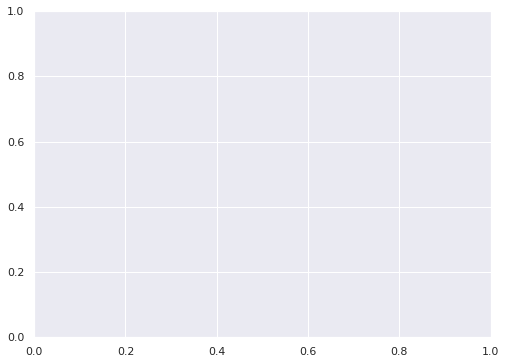

In [25]:
def plot_curve(ax, data, label):
    x = len(data)
    y = np.arange(x)
    ax.plot(y, data, label=label)
    
fig = plt.figure(figsize=(18, 6))
ax=fig.add_subplot(1,2,1)
plot_curve(ax, train_accuracy, "Training")
plot_curve(ax, valid_accuracy, "Validation")
ax.set_title('Accuracy')
ax=fig.add_subplot(1,2,2) 
plot_curve(ax, train_loss, "Training ")
plot_curve(ax, valid_loss, "Validation ")
ax.set_title('Loss')
plt.legend(['Training ','Validation'])
# plt.ylabel('Error')
# plt.xlabel('Epoch')
#savefig(saved_figures_folder+"lossAccuracy.png")

# **Test the model**
Once I was happy with my validation accuracy, I performed the final test on the test data.

In [26]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_loss, train_accuracy = evaluate(X_train, y_train)
    print("Accuracy Model On Train Images: {:.3f}".format(train_accuracy))
    
    valid_loss, valid_accuracy = evaluate(X_valid, y_valid)
    print("Accuracy Model On Valid Images: {:.3f}".format(valid_accuracy))    
    
    test_loss, test_accuracy = evaluate(X_valid, y_valid)
    print('Accuracy Model On Test Images: {:.3f}'.format(test_accuracy))
     

INFO:tensorflow:Restoring parameters from ./LeNet_Modul


Accuracy Model On Train Images: 1.000
Accuracy Model On Valid Images: 0.922
Accuracy Model On Test Images: 0.922
